In [20]:
import warnings
warnings.simplefilter('ignore')

In [21]:
# Install/import dependencies
# prophet, pandas

import pandas as pd
from prophet import Prophet


In [22]:
# Read data + process data 
from pandas import read_csv
path = 'data.csv'
df = read_csv(path)
# First few rows
print(df.head())

   Time Date  Total A&E Attendances
0   20100801                1752381
1   20100901                1756268
2   20101001                1801348
3   20101101                1651027
4   20101201                1737741


In [23]:
# ds is date, y is values

df.dtypes

Time Date                int64
Total A&E Attendances    int64
dtype: object

In [24]:
df.head(2)

,Time Date,Total A&E Attendances
0,20100801,1752381
1,20100901,1756268


In [25]:
# Pre-processing

df['Year'] = df['Time Date'].apply(lambda x: str(x)[-8:-4])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-4:-2])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[-2:])
df['ds'] = pd.DatetimeIndex(df['Year'] +'-'+df['Month']+'-'+df['Day'])

In [26]:
df.head(2)

,Time Date,Total A&E Attendances,Year,Month,Day,ds
0,20100801,1752381,2010,08,01,2010-08-01
1,20100901,1756268,2010,09,01,2010-09-01


In [27]:
# Check to see if it is datetime
df.dtypes

Time Date                         int64
Total A&E Attendances             int64
Year                             object
Month                            object
Day                              object
ds                       datetime64[ns]
dtype: object

In [28]:
df.head

<bound method NDFrame.head of      Time Date  Total A&E Attendances  Year Month Day         ds
0     20100801                1752381  2010    08  01 2010-08-01
1     20100901                1756268  2010    09  01 2010-09-01
2     20101001                1801348  2010    10  01 2010-10-01
3     20101101                1651027  2010    11  01 2010-11-01
4     20101201                1737741  2010    12  01 2010-12-01
..         ...                    ...   ...   ...  ..        ...
110   20191001                2170885  2019    10  01 2019-10-01
111   20191101                2143505  2019    11  01 2019-11-01
112   20191201                2180537  2019    12  01 2019-12-01
113   20200101                2114709  2020    01  01 2020-01-01
114   20200201                1969691  2020    02  01 2020-02-01

[115 rows x 6 columns]>

In [29]:
# Drop columns that are not needed inc. unique values, axis=1 is to drop the coloumns 
# inplace=True is for the same dataset (not creating another dataset)
# Can filter by specific type of emergency department by using a slicer (df[df['X']=='specifics'])

df.drop(['Time Date', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = 'y', 'ds'

In [30]:
df.head()

,y,ds
0,1752381,2010-08-01
1,1756268,2010-09-01
2,1801348,2010-10-01
3,1651027,2010-11-01
4,1737741,2010-12-01


In [36]:
# Train Model


m = Prophet(interval_width=0.95)

model = m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
prophet

<module 'prophet' from '/Users/arouba.zubair/opt/miniconda3/lib/python3.9/site-packages/prophet/__init__.py'>

In [33]:
#Forecast - trends, lower and upper estimates, daily seasonality, yhat is the predicted forecast
#periods you want to forecast for - up to 100. Frequency is by Month
# second line forecasts forward

future = m.make_future_dataframe(periods=100, freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-08-01,1.756192e+06,1.681983e+06,1.811917e+06,1.756192e+06,1.756192e+06,-11199.285130,-11199.285130,-11199.285130,26533.878344,26533.878344,26533.878344,-37733.163474,-37733.163474,-37733.163474,0.0,0.0,0.0,1.744992e+06
1,2010-09-01,1.758023e+06,1.677609e+06,1.806412e+06,1.758023e+06,1.758023e+06,-16758.614105,-16758.614105,-16758.614105,26533.878344,26533.878344,26533.878344,-43292.492449,-43292.492449,-43292.492449,0.0,0.0,0.0,1.741265e+06
2,2010-10-01,1.759796e+06,1.737185e+06,1.862861e+06,1.759796e+06,1.759796e+06,39147.257801,39147.257801,39147.257801,26533.878344,26533.878344,26533.878344,12613.379457,12613.379457,12613.379457,0.0,0.0,0.0,1.798943e+06
3,2010-11-01,1.761627e+06,1.655419e+06,1.783883e+06,1.761627e+06,1.761627e+06,-41016.346337,-41016.346337,-41016.346337,26533.878344,26533.878344,26533.878344,-67550.224681,-67550.224681,-67550.224681,0.0,0.0,0.0,1.720611e+06
4,2010-12-01,1.763400e+06,1.685317e+06,1.813139e+06,1.763400e+06,1.763400e+06,-12590.678844,-12590.678844,-12590.678844,26533.878344,26533.878344,26533.878344,-39124.557188,-39124.557188,-39124.557188,0.0,0.0,0.0,1.750809e+06


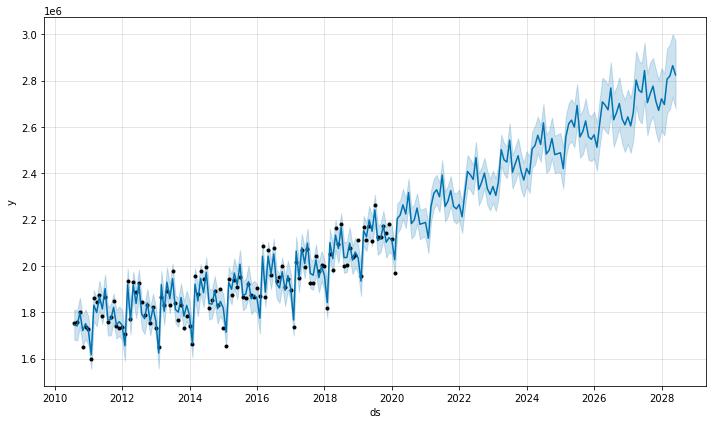

In [34]:
#Plot data, prophet model is stored in variable m


plot1 = m.plot(forecast)

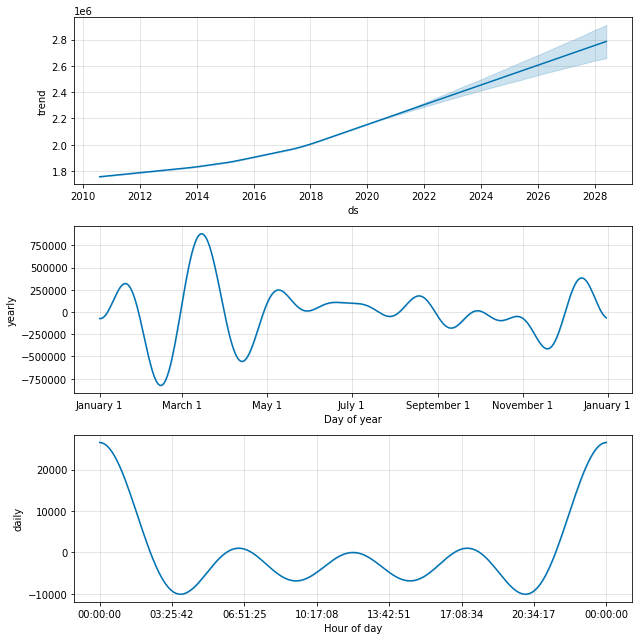

In [35]:
#Decompose

plot2 = m.plot_components(forecast)